# Loop-Based Multivariate Regression (Cross-Check)

This notebook uses the **loop-based** (non-vectorized) versions of `compute_cost` and `compute_gradient` to cross-check against the vectorized version.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
%matplotlib inline

## Load and Prepare Data

In [2]:
# Load dataset
df = pd.read_csv('rideshare_kaggle.csv')

# Select features and target
feature_names = ['distance', 'surge_multiplier', 'temperature', 'humidity']
X_train = df[feature_names].values
y_train = df['price'].values

# Remove NaN values
mask = ~np.any(np.isnan(X_train), axis=1) & ~np.isnan(y_train)
X_train = X_train[mask]
y_train = y_train[mask]

m, n = X_train.shape
print(f"Training examples (m): {m}")
print(f"Features (n): {n}")

Training examples (m): 637976
Features (n): 4


## Loop-Based compute_cost Function

This is the explicit loop version that iterates over each training example.

In [3]:
def compute_cost(X, y, w, b): 
    """
    compute cost
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """
    m = X.shape[0]
    cost = 0.0
    for i in range(m):                                
        f_wb_i = np.dot(X[i], w) + b           #(n,)(n,) = scalar (see np.dot)
        cost = cost + (f_wb_i - y[i])**2       #scalar
    cost = cost / (2 * m)                      #scalar    
    return cost

## Loop-Based compute_gradient Function

This uses nested loops - outer loop for examples, inner loop for features.

In [4]:
def compute_gradient(X, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b. 
    """
    m, n = X.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(X[i], w) + b) - y[i]   
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * X[i, j]    
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                
        
    return dj_db, dj_dw

## Test the Functions

In [5]:
# Test with initial parameters
w_test = np.zeros(n)
b_test = 0.0

# Test compute_cost
cost = compute_cost(X_train, y_train, w_test, b_test)
print(f"Cost at w=zeros, b=0: {cost:.4f}")

# Test compute_gradient
dj_db, dj_dw = compute_gradient(X_train, y_train, w_test, b_test)
print(f"\nGradients at w=zeros, b=0:")
print(f"dj_db: {dj_db:.4f}")
for i, feature in enumerate(feature_names):
    print(f"dj_dw[{feature}]: {dj_dw[i]:.4f}")

Cost at w=zeros, b=0: 180.3424

Gradients at w=zeros, b=0:
dj_db: -16.5451
dj_dw[distance]: -39.8748
dj_dw[surge_multiplier]: -17.0084
dj_dw[temperature]: -654.8906
dj_dw[humidity]: -12.2593


## Gradient Descent

In [6]:
def gradient_descent(X, y, w_init, b_init, alpha, num_iters):
    """
    Performs batch gradient descent
    """
    w = copy.deepcopy(w_init)
    b = b_init
    J_history = []
    
    for i in range(num_iters):
        # Compute gradient (note: returns dj_db, dj_dw)
        dj_db, dj_dw = compute_gradient(X, y, w, b)
        
        # Update parameters
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        # Save cost every 100 iterations
        if i % 100 == 0:
            cost = compute_cost(X, y, w, b)
            J_history.append(cost)
            print(f"Iteration {i:5d}: Cost = {cost:.4f}")
    
    return w, b, J_history

## Run Gradient Descent and Compare Results

In [7]:
# Initialize parameters
initial_w = np.zeros(n)
initial_b = 0.0

# Hyperparameters
alpha = 0.001
iterations = 1500

print("="*60)
print("LOOP-BASED GRADIENT DESCENT")
print("="*60)
print(f"Dataset: {m} samples, {n} features")
print(f"Learning rate: {alpha}, Iterations: {iterations}")
print("-"*60)

# Run gradient descent
w_loop, b_loop, J_history_loop = gradient_descent(X_train, y_train, initial_w, initial_b, alpha, iterations)

print("-"*60)
print("\n📊 FINAL RESULTS (Loop-Based):")
print("-"*60)
print(f"Final w: [{w_loop[0]:.4f}, {w_loop[1]:.4f}, {w_loop[2]:.4f}, {w_loop[3]:.4f}]")
print(f"Final b: {b_loop:.4f}")

final_cost_loop = compute_cost(X_train, y_train, w_loop, b_loop)
print(f"Final Cost: {final_cost_loop:.4f}")

LOOP-BASED GRADIENT DESCENT
Dataset: 637976 samples, 4 features
Learning rate: 0.001, Iterations: 1500
------------------------------------------------------------
Iteration     0: Cost = 98.2219
Iteration   100: Cost = 45.2442
Iteration   200: Cost = 43.7846
Iteration   300: Cost = 42.6812
Iteration   400: Cost = 41.8455
Iteration   500: Cost = 41.2110
Iteration   600: Cost = 40.7277
Iteration   700: Cost = 40.3583
Iteration   800: Cost = 40.0743
Iteration   900: Cost = 39.8547
Iteration  1000: Cost = 39.6836
Iteration  1100: Cost = 39.5489
Iteration  1200: Cost = 39.4417
Iteration  1300: Cost = 39.3552
Iteration  1400: Cost = 39.2843
------------------------------------------------------------

📊 FINAL RESULTS (Loop-Based):
------------------------------------------------------------
Final w: [2.8551, 0.8057, 0.2164, 0.2351]
Final b: 0.4909
Final Cost: 39.2258


## Cross-Check with Vectorized Version

Now let's implement the vectorized version and compare the results to ensure both produce identical outputs.

In [8]:
# VECTORIZED VERSIONS (for comparison)

def compute_cost_vectorized(X, y, w, b):
    """Vectorized cost function using np.dot"""
    m = X.shape[0]
    predictions = np.dot(X, w) + b
    errors = predictions - y
    cost = np.dot(errors, errors) / (2 * m)
    return cost

def compute_gradient_vectorized(X, y, w, b):
    """Vectorized gradient computation using np.dot"""
    m = X.shape[0]
    predictions = np.dot(X, w) + b
    errors = predictions - y
    dj_dw = np.dot(X.T, errors) / m
    dj_db = np.sum(errors) / m
    return dj_db, dj_dw

def gradient_descent_vectorized(X, y, w_init, b_init, alpha, num_iters):
    """Gradient descent using vectorized operations"""
    w = copy.deepcopy(w_init)
    b = b_init
    J_history = []
    
    for i in range(num_iters):
        dj_db, dj_dw = compute_gradient_vectorized(X, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        if i % 100 == 0:
            cost = compute_cost_vectorized(X, y, w, b)
            J_history.append(cost)
    
    return w, b, J_history

print("✅ Vectorized functions defined")

✅ Vectorized functions defined


In [9]:
# Run vectorized version
print("="*60)
print("VECTORIZED GRADIENT DESCENT")
print("="*60)

w_vec, b_vec, J_history_vec = gradient_descent_vectorized(X_train, y_train, initial_w, initial_b, alpha, iterations)

print("\n📊 FINAL RESULTS (Vectorized):")
print("-"*60)
print(f"Final w: [{w_vec[0]:.4f}, {w_vec[1]:.4f}, {w_vec[2]:.4f}, {w_vec[3]:.4f}]")
print(f"Final b: {b_vec:.4f}")

final_cost_vec = compute_cost_vectorized(X_train, y_train, w_vec, b_vec)
print(f"Final Cost: {final_cost_vec:.4f}")

VECTORIZED GRADIENT DESCENT

📊 FINAL RESULTS (Vectorized):
------------------------------------------------------------
Final w: [2.8551, 0.8057, 0.2164, 0.2351]
Final b: 0.4909
Final Cost: 39.2258


## 🔍 Comparison Summary

In [10]:
print("="*70)
print("🔍 CROSS-CHECK: LOOP vs VECTORIZED COMPARISON")
print("="*70)

print("\n📌 WEIGHTS (w):")
print("-"*70)
print(f"  Loop-based:   [{w_loop[0]:.8f}, {w_loop[1]:.8f}, {w_loop[2]:.8f}, {w_loop[3]:.8f}]")
print(f"  Vectorized:   [{w_vec[0]:.8f}, {w_vec[1]:.8f}, {w_vec[2]:.8f}, {w_vec[3]:.8f}]")
print(f"  Difference:   {np.max(np.abs(w_loop - w_vec)):.2e}")

print("\n📌 BIAS (b):")
print("-"*70)
print(f"  Loop-based:   {b_loop:.8f}")
print(f"  Vectorized:   {b_vec:.8f}")
print(f"  Difference:   {abs(b_loop - b_vec):.2e}")

print("\n📌 FINAL COST:")
print("-"*70)
print(f"  Loop-based:   {final_cost_loop:.8f}")
print(f"  Vectorized:   {final_cost_vec:.8f}")
print(f"  Difference:   {abs(final_cost_loop - final_cost_vec):.2e}")

# Verify they match
all_match = (np.allclose(w_loop, w_vec) and 
             np.isclose(b_loop, b_vec) and 
             np.isclose(final_cost_loop, final_cost_vec))

print("\n" + "="*70)
if all_match:
    print("✅ SUCCESS: Loop-based and Vectorized implementations produce IDENTICAL results!")
else:
    print("❌ WARNING: Results differ between implementations")
print("="*70)

🔍 CROSS-CHECK: LOOP vs VECTORIZED COMPARISON

📌 WEIGHTS (w):
----------------------------------------------------------------------
  Loop-based:   [2.85508922, 0.80566255, 0.21638927, 0.23510837]
  Vectorized:   [2.85508922, 0.80566255, 0.21638927, 0.23510837]
  Difference:   2.66e-15

📌 BIAS (b):
----------------------------------------------------------------------
  Loop-based:   0.49092207
  Vectorized:   0.49092207
  Difference:   6.11e-16

📌 FINAL COST:
----------------------------------------------------------------------
  Loop-based:   39.22582003
  Vectorized:   39.22582003
  Difference:   6.96e-13

✅ SUCCESS: Loop-based and Vectorized implementations produce IDENTICAL results!


## 📈 Cost Convergence Visualization

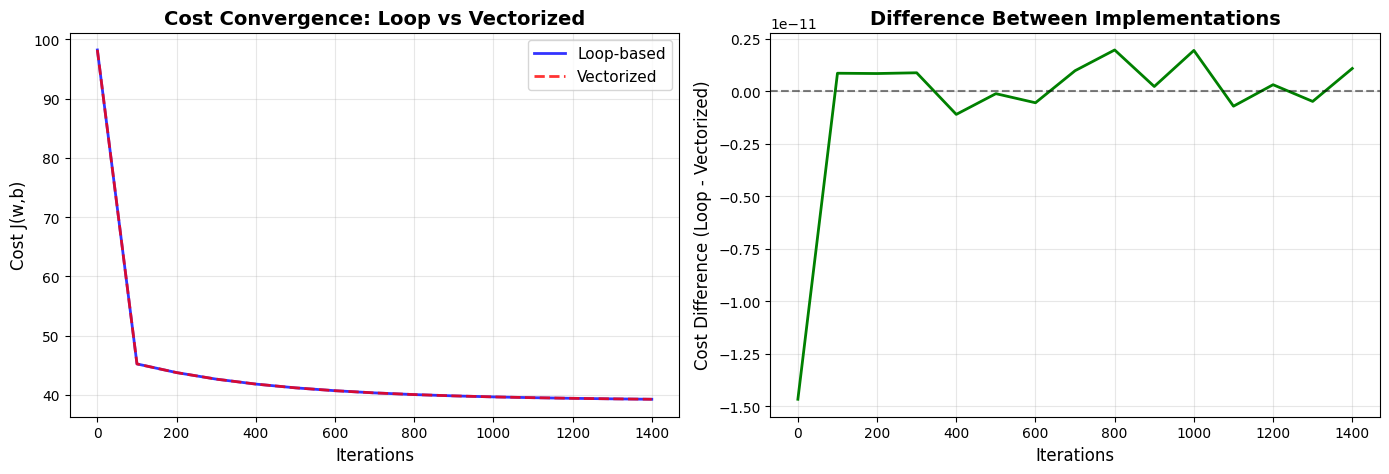


📊 Maximum cost difference across all iterations: 1.47e-11


In [11]:
# Plot cost history comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Both curves overlaid
ax1 = axes[0]
iterations_plot = range(0, len(J_history_loop) * 100, 100)
ax1.plot(iterations_plot, J_history_loop, 'b-', linewidth=2, label='Loop-based', alpha=0.8)
ax1.plot(iterations_plot, J_history_vec, 'r--', linewidth=2, label='Vectorized', alpha=0.8)
ax1.set_xlabel('Iterations', fontsize=12)
ax1.set_ylabel('Cost J(w,b)', fontsize=12)
ax1.set_title('Cost Convergence: Loop vs Vectorized', fontsize=14, fontweight='bold')
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)

# Plot 2: Difference between the two
ax2 = axes[1]
diff = np.array(J_history_loop) - np.array(J_history_vec)
ax2.plot(iterations_plot, diff, 'g-', linewidth=2)
ax2.axhline(y=0, color='k', linestyle='--', alpha=0.5)
ax2.set_xlabel('Iterations', fontsize=12)
ax2.set_ylabel('Cost Difference (Loop - Vectorized)', fontsize=12)
ax2.set_title('Difference Between Implementations', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

plt.tight_layout()
plt.show()

print(f"\n📊 Maximum cost difference across all iterations: {np.max(np.abs(diff)):.2e}")